## Sentiment Analysis

In [2]:
import time 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import nltk 
import io 
import unicodedata 
import re 
import string 
from numpy import linalg 
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.tokenize import PunktSentenceTokenizer 
from nltk.corpus import webtext 
from nltk.stem.porter import PorterStemmer 
from nltk.stem.wordnet import WordNetLemmatizer 
from textblob import TextBlob 
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import csv
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [3]:
#!pip install textblob

### Read the coronavirus Tweets.csv file and set it as a Dataframe called covid_tweets. Check the head, info, and describe methods on covid_tweets 

In [4]:
covid_tweets=pd.read_csv(r"C:\Users\Administrator\Downloads\Coronavirus Tweets.csv", encoding='latin-1')

In [5]:
covid_tweets.head() 

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,2
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,1
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,1
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,1
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0


In [6]:
covid_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.9+ MB


In [7]:
covid_tweets.describe()

,UserName,ScreenName,Sentiment
count,41157.000000,41157.000000,41157.000000
mean,24377.000000,69329.000000,0.813276
std,11881.146851,11881.146851,0.725727
min,3799.000000,48751.000000,0.000000
25%,14088.000000,59040.000000,0.000000
50%,24377.000000,69329.000000,1.000000
75%,34666.000000,79618.000000,1.000000
max,44955.000000,89907.000000,2.000000


### Remove punctuations and stopwords from the text in the ‘OriginalTweet’ column. Replace special symbols with ‘_’(underscore). Convert all the letters to lowercase.

In [8]:
covid_tweets.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [9]:
covid_tweets['OriginalTweet']

0        @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
3        My food stock is not the only one which is emp...
4        Me, ready to go at supermarket during the #COV...
                               ...                        
41152    Airline pilots offering to stock supermarket s...
41153    Response to complaint not provided citing COVI...
41154    You know itÂs getting tough when @KameronWild...
41155    Is it wrong that the smell of hand sanitizer i...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [12]:
covid_tweets.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [13]:
covid_tweets['tweet_without_stopwords'] = covid_tweets['OriginalTweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [14]:
covid_tweets['tweet_without_stopwords'][0]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa https://t.co/xX6ghGFzCC https://t.co/I2NlzdxNo8'

In [15]:
punct = "\n\r"+string.punctuation
covid_tweets['tweet_without_stopwords']= covid_tweets['tweet_without_stopwords'].str.translate(str.maketrans('','',punct))


In [16]:
covid_tweets['tweet_without_stopwords'][0]

'MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa httpstcoxX6ghGFzCC httpstcoI2NlzdxNo8'

In [17]:
punct = "\n\r"+string.punctuation
punct

'\n\r!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
#convert all letters to lowercase

covid_tweets['tweet_without_stopwords']= covid_tweets['tweet_without_stopwords'].map(lambda s:s.lower() if type(s) == str else s)

In [20]:
covid_tweets.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'tweet_without_stopwords'],
      dtype='object')

In [21]:
covid_tweets['tweet_without_stopwords']

0        menyrbie philgahan chrisitv httpstcoifz9fan2pa...
1        advice talk neighbours family exchange phone n...
2        coronavirus australia woolworths give elderly ...
3        my food stock one empty please panic there wil...
4        me ready go supermarket covid19 outbreak not i...
                               ...                        
41152    airline pilots offering stock supermarket shel...
41153    response complaint provided citing covid19 rel...
41154    you know itâs getting tough kameronwilds rati...
41155    is wrong smell hand sanitizer starting turn on...
41156    tartiicat well newused rift s going 70000 amaz...
Name: tweet_without_stopwords, Length: 41157, dtype: object

### Normalize tweets by using Stemming or Lemmatization.

In [22]:
# stemming

In [23]:
st = PorterStemmer()
covid_tweets['tweet_without_stopwords']= covid_tweets['tweet_without_stopwords'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [24]:
covid_tweets['tweet_without_stopwords']

0        menyrbi philgahan chrisitv httpstcoifz9fan2pa ...
1        advic talk neighbour famili exchang phone numb...
2        coronaviru australia woolworth give elderli di...
3        my food stock one empti pleas panic there will...
4        me readi go supermarket covid19 outbreak not i...
                               ...                        
41152    airlin pilot offer stock supermarket shelv nz ...
41153    respons complaint provid cite covid19 relat de...
41154    you know itâ get tough kameronwild ration toi...
41155    is wrong smell hand sanit start turn on corona...
41156    tartiicat well newus rift s go 70000 amazon rn...
Name: tweet_without_stopwords, Length: 41157, dtype: object

In [25]:
covid_tweets.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'tweet_without_stopwords'],
      dtype='object')

### Preprocessed tweets should be included in the covid_tweets data frame as cleaned_tweets

In [26]:
covid_tweets.rename(columns={'tweet_without_stopwords':'cleaned_tweets'},inplace=True)

In [27]:
covid_tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweets
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,2,menyrbi philgahan chrisitv httpstcoifz9fan2pa ...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,1,advic talk neighbour famili exchang phone numb...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,1,coronaviru australia woolworth give elderli di...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,1,my food stock one empti pleas panic there will...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0,me readi go supermarket covid19 outbreak not i...


### Create two objects X and y. X will be the ' cleaned_tweets ' column of covid_tweets data frame and y will be the ' Sentiment' column. 

In [28]:
X=covid_tweets.cleaned_tweets

In [29]:
y=covid_tweets.Sentiment

In [30]:
covid_tweets.head(2)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweets
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,2,menyrbi philgahan chrisitv httpstcoifz9fan2pa ...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,1,advic talk neighbour famili exchang phone numb...


### create a CountVectorizer object and split the data into training and testing sets. Perform TFIDF vectorization on Text feature “cleaned_tweets’

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 7500)
X = cv.fit_transform(covid_tweets['cleaned_tweets']).toarray()
y = covid_tweets.Sentiment.values

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### Train a decision tree model for classifying the headlines and Displaying the confusion Matrix.

In [35]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [36]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2066  693  321]
 [ 672 2658  296]
 [ 232  250 1044]]


0.7006802721088435

### Display the HMM POS tagging on the first 2 rows of ‘cleaned_tweets’. 

In [50]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [51]:
wordsList=covid_tweets["cleaned_tweets"][:2]

In [52]:

tagged = nltk.pos_tag(wordsList)
 
print(tagged)

[('menyrbi philgahan chrisitv httpstcoifz9fan2pa httpstcoxx6ghgfzcc httpstcoi2nlzdxno8', 'NN'), ('advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist gp set onlin shop account poss adequ suppli regular med order', 'NN')]


In [2]:
filename = "Pantaloons FB page comments.xlsx"

In [3]:
df = pd.read_excel(filename,header = 1)

In [4]:
dforiginal = pd.read_excel(filename,header = 1)

In [5]:
#select the column with comments/feedback/review
df = df["Comments"]

In [6]:
#df.to_csv('filepath.txt', sep='\n', index=False, header = False, quoting = csv.QUOTE_NONE)

## Text Blob

In [7]:
def clean_text(text): 
    ''' 
    Utility function to clean tweet text by removing links, special characters 
    using simple regex statements. 
    '''
    #return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split()) 
    return ' '.join(re.sub("\\. +|\\.[^a-z0-9[:punct:]]|!+|\\?+|\\.[A-Z]|\\.\\.+|\\.s+", " ", text).split()) 

def get_text_sentiment(text): 
    ''' 
    Utility function to classify sentiment of passed text 
    using textblob's sentiment method 
    '''
    # create TextBlob object of passed  text 
    analysis = TextBlob(clean_text(text)) 
 
    # set sentiment 
    #print(analysis.sentiment.polarity)
    if analysis.sentiment.polarity > 0: 
        return 'Positive', analysis.sentiment.polarity
    elif analysis.sentiment.polarity == 0: 
        return 'Neutral', analysis.sentiment.polarity
    else: 
        return 'Negative', analysis.sentiment.polarity
    

def get_text(): 
    ''' 
    Main function to fetch texts and parse them. 
    '''
    global data
    
    data = pd.DataFrame()
    
    # empty list to store parsed texts and flag
    texts = [] 
    comments = []
    sentiment_flag = []
    score = []
    Sentiment = []
    
    #with open('filepath.txt', encoding = 'ISO-8859-2') as f: 
        
    # parsing text one by one 
    #for text in f.read().split('\n'):
    for text in df:

        # empty dictionary to store required params of a text 
        parsed_text = {} 
        # saving text of text 
        parsed_text['text'] = text
        # saving sentiment, score of text 
        parsed_text['sentiment'] = get_text_sentiment(text)
        # appending parsed comments to comments list 
        comments.append(parsed_text['text']) 
        # appending sentiment_flag to sentiment_flag list 
        sentiment_flag.append(parsed_text['sentiment']) 
        # code to split it into 2 lists 
        Sentiment, Score = map(list, zip(*sentiment_flag))
        # appending parsed text to texts list 
        texts.append(parsed_text) 
        
    # appending sentiment_flag list to dataframe
    data['Comments'] = comments
    data['TextBlob_Sentiment_Flag'] = Sentiment
    data['TextBlob_Score'] = Score
       
    # return parsed tweets 
    return data 

def main(): 
     
    # calling function to get text 
    get_text()    

if __name__ == "__main__": 
    # calling main function 
    main() 


In [8]:
#data.to_csv("TextBlob_output.csv",index = False)

## Vader

In [9]:
sid = SentimentIntensityAnalyzer() 
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle') 

In [10]:
lst_txt = list()
lst_scor = list()
lst_neg = list()
lst_pos = list()
lst_neu = list()
#with open('filepath.txt', encoding ='ISO-8859-2') as f: 
#for text in f.read().split('\n'): 
for text in df: 
    lst_txt.append(text) 
    scores = sid.polarity_scores(text) 
    for key in sorted(scores):
        if key == 'compound':
            lst_scor.append(scores[key])
        if key == 'pos':
            lst_pos.append(scores[key])
        if key == 'neu':
            lst_neu.append(scores[key])
        if key == 'neg':
            lst_neg.append(scores[key])

In [11]:
#data['Text'] = lst_txt
#data['Neg_Score'] = lst_neg
#data['Pos_Score'] = lst_pos
#data['Neu_Score'] = lst_neu

In [12]:
flag = []
for i in lst_scor:
    if (i == 0):
        flag.append('Neutral')
    elif (i < 0):  
        flag.append('Negative')
    elif (i > 0):  
        flag.append('Positive')

In [13]:
data['Vader_Sentiment_Flag'] = flag
data['Vader_Score'] = lst_scor

In [14]:
data["No."] = range(1,len(data)+1)

In [16]:
dftoexport = pd.merge(dforiginal,data[['TextBlob_Sentiment_Flag', 'TextBlob_Score',
       'Vader_Sentiment_Flag', 'Vader_Score', 'No.']],left_on=["No."],right_on=["No."])

In [12]:
#dftoexport.to_excel(filename.replace(".xlsx"," output.xlsx"),index = False)

## Wordcloud

In [13]:
df = df.str.lower()
read = df

In [14]:
# define desired replacements here if required remove comment tag
#read = read.str.replace("pataloons", "pantaloon").replace("pantaloons", "pantaloon")

In [15]:
#remove stop words
read = " ".join(review for review in read)
stop_words = set(stopwords.words('english')) 
#can add stop words as many as needed but within the list
stop_words.update(["rd","hi","bt","rs","id","yr","till"])
word_tokens = word_tokenize(read) 
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
filtered_sentence = [] 
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
#print(filtered_sentence) 

In [63]:
text = " ".join(review for review in filtered_sentence)

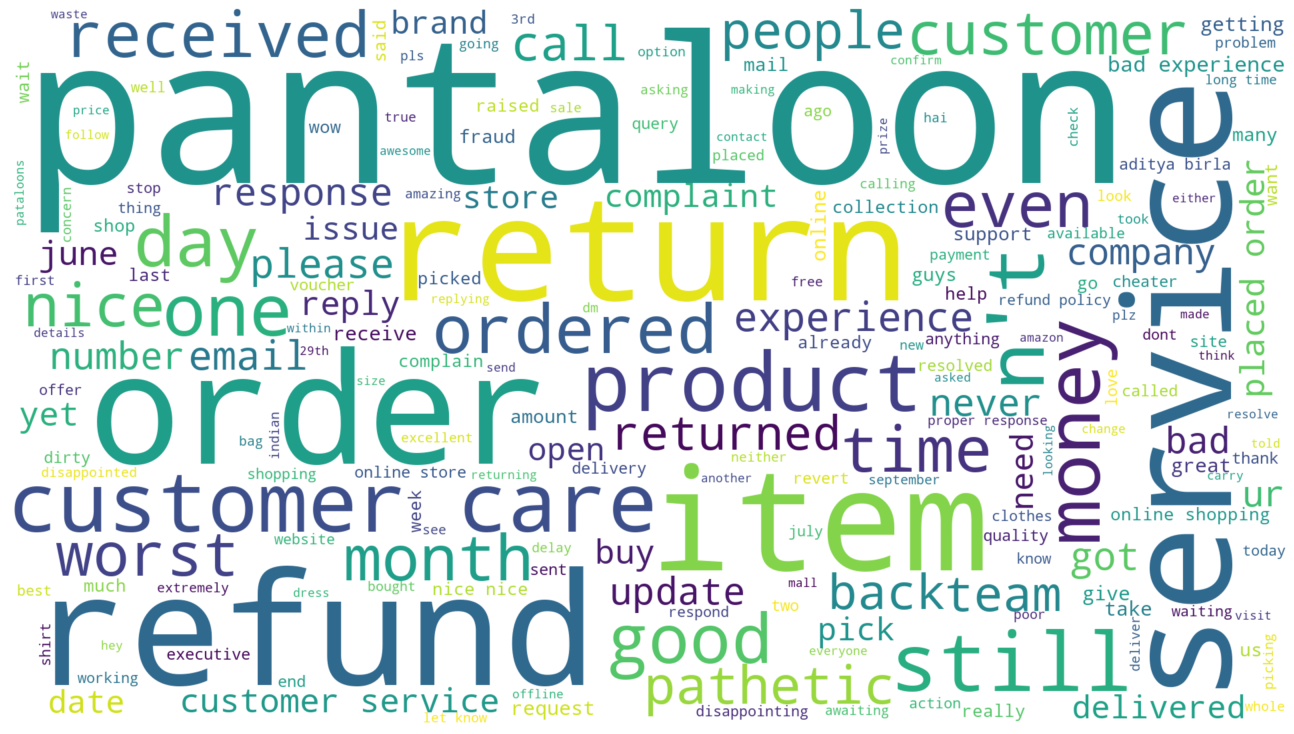

In [30]:
'''
#function if need to get colors in specific color code range
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 60.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    #return "hsl({}, {}%, {}%)".format(h, s, l)
    #red
    return (227, 25, 25)
    #green
    #return (7, 168, 34)
# Generate a word cloud image
#wordcloud = WordCloud(background_color="white",color_func= random_color_func,width=1920, height=1080).generate(text)
'''
wordcloud = WordCloud(background_color="white",width=1920, height=1080).generate(text)


# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [32]:
stemmer = PorterStemmer()
stemma_list_of_words = []
stemma_list_of_words.append([stemmer.stem(word) for word in filtered_sentence])
#stemma_list_of_words
stemma_list_of_words = stemma_list_of_words[0]
stemmed_text = " ".join(review for review in stemma_list_of_words)

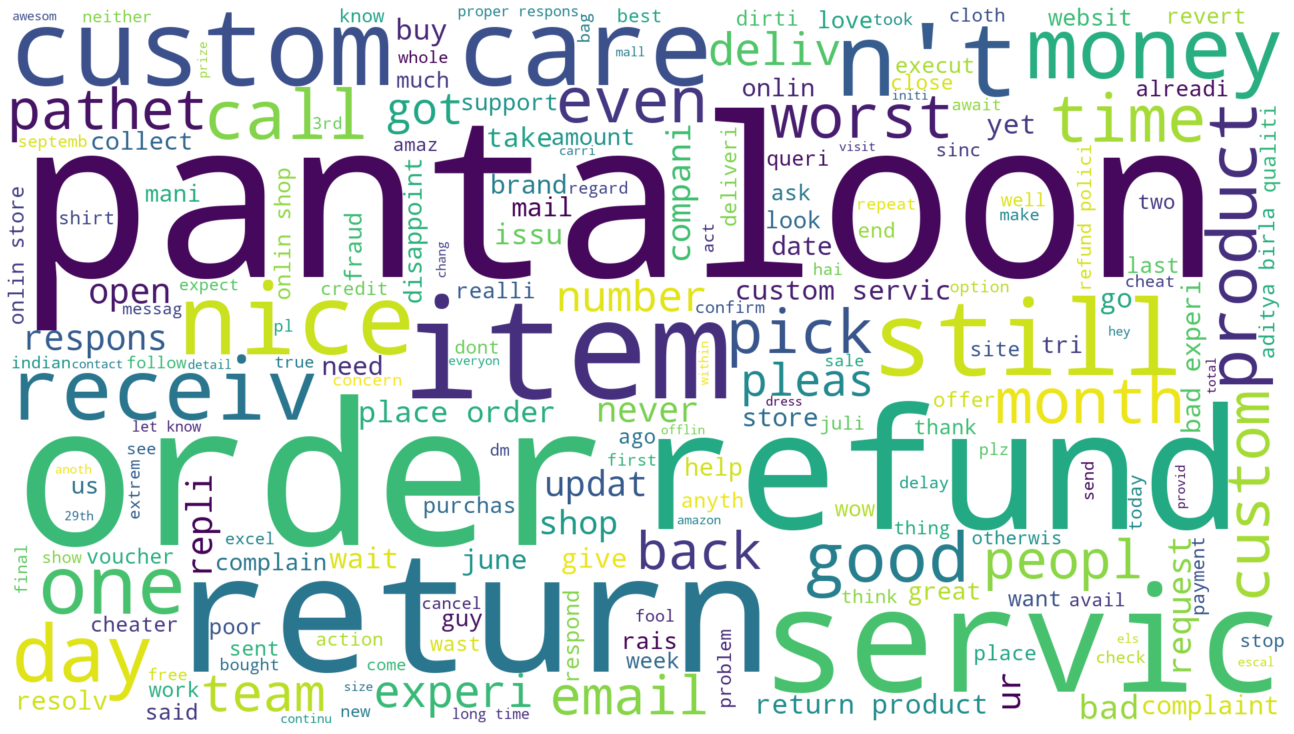

In [33]:
wordcloud = WordCloud( background_color="white",width=1920, height=1080).generate(stemmed_text)
# Display the generated image:
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()